### Predicting Home Prices in Bangalore

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Let's consider *location, size, total_sqft, bath and price* as our features

In [7]:
condensed_df = df.drop(['area_type','society','balcony'
                        ,'availability'],axis='columns')
condensed_df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

Let's clean the data by removing the NA values

In [8]:
condensed_df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
condensed_df.shape

(13320, 5)

In [10]:
clean_df = condensed_df.dropna()
clean_df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
clean_df.shape

(13246, 5)

We lost 74 records after removing the na values. It is acceptable as the # of record count is very less.

#### Feature Engineering

In [12]:
clean_df["size"].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
18 Bedroom       1
19 BHK           1
27 BHK           1
13 BHK           1
16 BHK           1
12 Bedroom       1
14 BHK           1
43 Bedroom       1
Name: size, dtype: int64

In [13]:
clean_df["bhk"] = clean_df["size"].apply(lambda x: int(x.split(' ')[0]))

In [14]:
clean_df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
clean_df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [16]:
clean_df[clean_df.bhk > 25]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
clean_df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def is_float(f):
    try:
        float(f)
    except:
        return False
    return True

In [19]:
clean_df[~clean_df["total_sqft"].apply(is_float)].shape

(190, 6)

In [20]:
clean_df[~clean_df["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
def convert_sft_rng_to_num(x):
    tokens = x.split('-')
    if(len(tokens) == 2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [22]:
convert_sft_rng_to_num('1145 - 1340')

1242.5

In [23]:
convert_sft_rng_to_num('4125Perch')

In [24]:
clean_df1 = clean_df.copy()
clean_df1['total_sft'] = clean_df1['total_sqft'].apply(convert_sft_rng_to_num)
clean_df1.head()

,location,size,total_sqft,bath,price,bhk,total_sft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [25]:
clean_df2 = clean_df1.copy()
clean_df2['price_per_sft'] = clean_df2['price']*100000/clean_df2['total_sft']
clean_df2.head()

,location,size,total_sqft,bath,price,bhk,total_sft,price_per_sft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000


In [26]:
len(clean_df2.location.unique())

1304

In [27]:
clean_df2.location = clean_df2.location.apply(lambda x: x.strip())

In [28]:
loc_counts = clean_df2.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_counts

location
Whitefield                                      535
Sarjapur  Road                                  392
Electronic City                                 304
Kanakpura Road                                  266
Thanisandra                                     236
Yelahanka                                       210
Uttarahalli                                     186
Hebbal                                          176
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     150
7th Phase JP Nagar                              149
Haralur Road                                    141
Electronic City Phase II                        131
Rajaji Nagar                                    106
Chandapura                                       98
Bellandur                                        96
Hoodi                                            88
KR 

In [29]:
loc_counts_less_than_10 = loc_counts[loc_counts<=10]
loc_counts_less_than_10

location
BTM 1st Stage                                   10
Basapura                                        10
Sector 1 HSR Layout                             10
Naganathapura                                   10
Kalkere                                         10
Nagadevanahalli                                 10
Nagappa Reddy Layout                            10
Sadashiva Nagar                                 10
Gunjur Palya                                    10
Dairy Circle                                    10
Ganga Nagar                                     10
Dodsworth Layout                                10
1st Block Koramangala                           10
Chandra Layout                                   9
Jakkur Plantation                                9
2nd Phase JP Nagar                               9
Yemlur                                           9
Mathikere                                        9
Medahalli                                        9
Volagerekallahalli    

In [30]:
clean_df2.location = clean_df2.location.apply(lambda x: 'other' if x in loc_counts_less_than_10 else x)

In [31]:
len(clean_df2.location.unique())

242

In [32]:
clean_df2.head(10)

,location,size,total_sqft,bath,price,bhk,total_sft,price_per_sft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,2 BHK,1170,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,4 BHK,2732,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,3 BHK,1310,3.0,63.25,3,1310.0,4828.244275
9,other,6 Bedroom,1020,6.0,370.00,6,1020.0,36274.509804


In [33]:
clean_df2[clean_df2.total_sft/clean_df2.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,total_sft,price_per_sft
9,other,6 Bedroom,1020,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,600,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,500,3.0,100.0,3,500.0,20000.000000


In [34]:
clean_df2 = clean_df2.drop(['total_sqft'],axis=1)

In [35]:
clean_df2.head()

,location,size,bath,price,bhk,total_sft,price_per_sft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000


In [36]:
clean_df2.shape

(13246, 7)

In [37]:
clean_df2 = clean_df2[~(clean_df2.total_sft/clean_df2.bhk < 300)]

In [38]:
clean_df2.shape

(12502, 7)

In [39]:
clean_df2.price_per_sft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sft, dtype: float64

In [42]:
def rem_pps_outliers(df):
    out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sft)
        sd = np.std(subdf.price_per_sft)
        red_df = subdf[(subdf.price_per_sft>(m-sd))&(subdf.price_per_sft<=(m+sd))]
        out = pd.concat([out,red_df], ignore_index = True)
    return out
        

In [43]:
clean_df3 = rem_pps_outliers(clean_df2)
clean_df3.shape

(10241, 7)

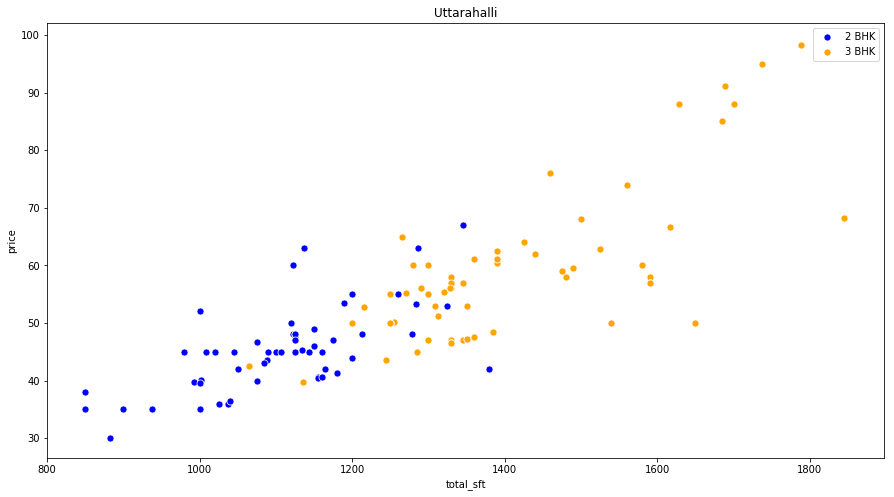

In [44]:
def visualize_scatter(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,8)
    sns.scatterplot(x = 'total_sft',y = 'price' ,color='blue',label='2 BHK', s=50, data = bhk2)
    sns.scatterplot(x = 'total_sft',y = 'price' ,color='orange',label='3 BHK', s=50, data = bhk3)
    plt.title(location)
    
visualize_scatter(clean_df3,"Uttarahalli")

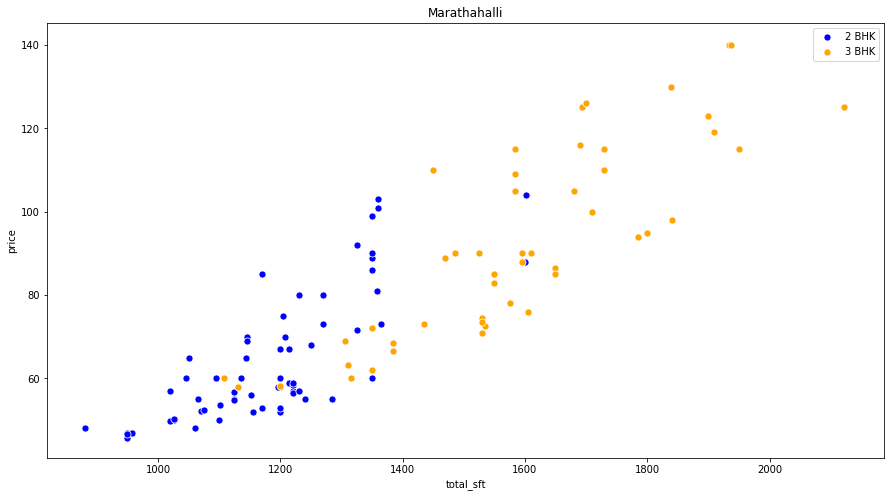

In [45]:
visualize_scatter(clean_df3,"Marathahalli")

In [46]:
def rem_outliers_by_bhk(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sft),
                'std': np.std(bhk_df.price_per_sft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [47]:
clean_df4 = rem_outliers_by_bhk(clean_df3)

clean_df4.shape

(7329, 7)

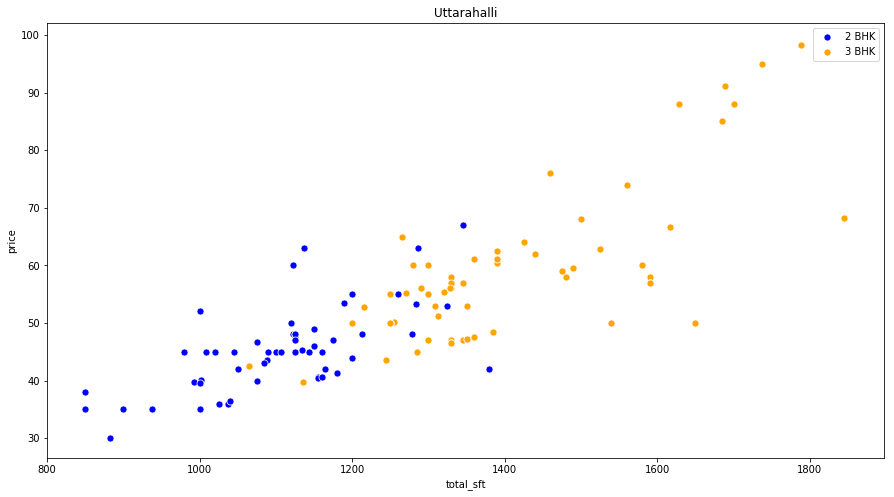

In [48]:
visualize_scatter(clean_df3,"Uttarahalli")

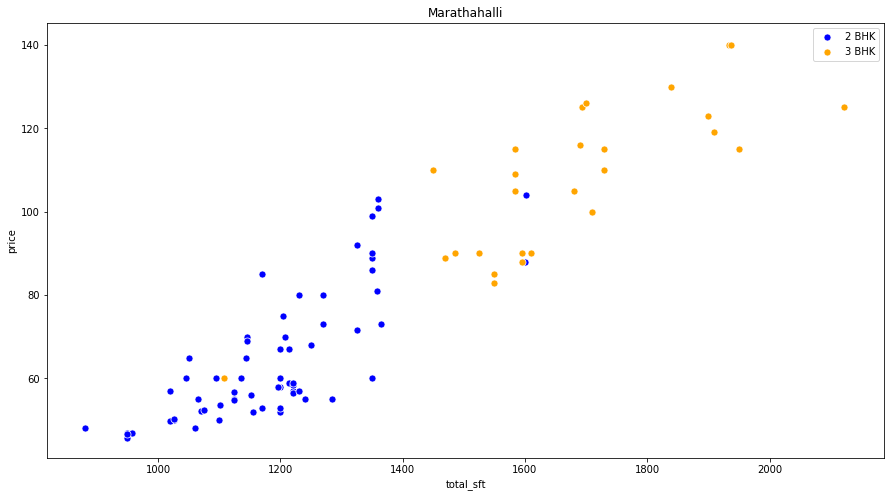

In [49]:
visualize_scatter(clean_df4,"Marathahalli")